### ЛР4

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [2]:
# чтение обучающей выборки
data = pd.read_csv('letterdata.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<AxesSubplot:>

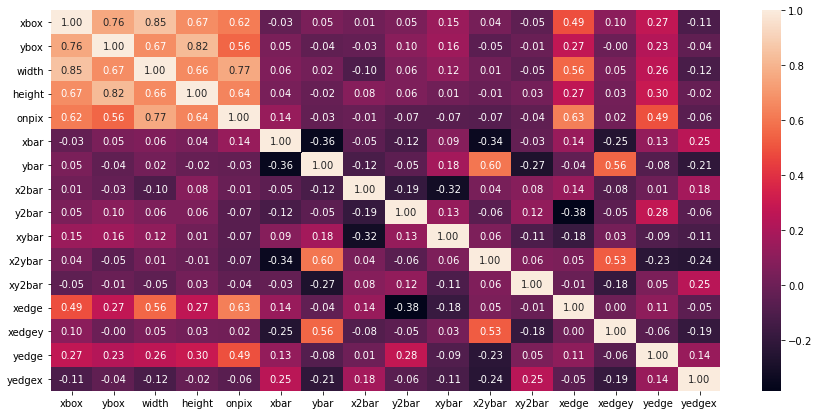

In [4]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [5]:
X = data.drop(['width', 'letter'], axis = 1)
Y = data.width
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    xbox  ybox  height  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybar  xy2bar  \
0     2     8       5      1     8    13      0      6      6      10       8   
1     5    12       7      2    10     5      5      4     13       3       9   
2     4    11       8      6    10     6      2      6     10       3       7   
3     7    11       6      3     5     9      4      6      4       4      10   
4     2     1       1      1     8     6      6      6      6       5       9   

   xedge  xedgey  yedge  yedgex  
0      0       8      0       8  
1      2       8      4      10  
2      3       7      3       9  
3      6      10      2       8  
4      1       7      5      10   

Выходные данные:

 0    3
1    3
2    6
3    6
4    3
Name: width, dtype: int64


In [6]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        xbox  ybox  height  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybar  \
17964     3     6       5      5     9     8      5      5      7       6   
11632     2     1       1      1     6     9      8      4      7       5   
10869     4     9       7      3     8     7      8      5     10       5   
9179      4    10       8      2     7     9      0      8     14       6   
8871      4     8       6      2     8     5      4      6     15       6   

       xy2bar  xedge  xedgey  yedge  yedgex  
17964       8      5       8      9      11  
11632       8      2       7      4      11  
10869       9      3       8      4       7  
9179        6      0      10      2       7  
8871       11      1       6      0       7   

Входные параметры тестовой выборки:

        xbox  ybox  height  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybar  \
19134     3     3       2      1     4    11      2      7     11      10   
4981      3     5       4   

### Построение линейной регрессии

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [8]:
# предсказываем значения
Lin_Reg = LinearRegression().fit(X_train, Y_train)
lr_y_pred = Lin_Reg.predict(X_test)

**Построим график по полученным значениям**

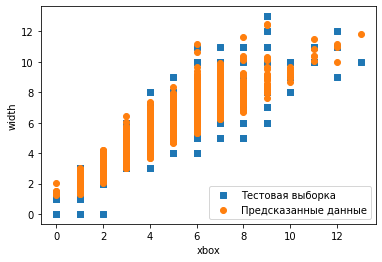

In [9]:
# построим график для визуального сравнения
plt.scatter(X_test.xbox, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.xbox, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('xbox')
plt.ylabel ('width')
plt.show()

### SVM

In [10]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [11]:
# предсказываем значения
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
lr_y_pred = svc.predict(X_test)

**Построим график по полученным значениям**

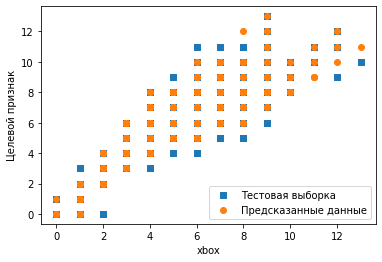

In [12]:
# построим график для визуального сравнения
plt.scatter(X_test.xbox, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.xbox, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('xbox')
plt.ylabel ('Целевой признак')
plt.show()

### Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [14]:
# предсказываем значения
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
lr_y_pred = clf.predict(X_test)

**Построим график по полученным значениям**

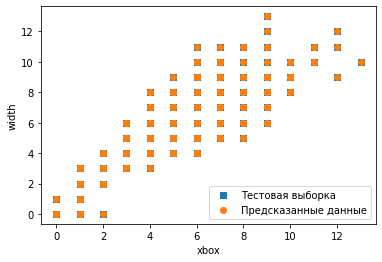

In [15]:
# построим график для визуального сравнения
plt.scatter(X_test.xbox, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.xbox, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('xbox')
plt.ylabel ('width')
plt.show()